# 09 Exercise Solution - Fourier Transforms

In this exercise set we will work with a real audio signal. We will often use the word "pure tone" when we talk about a signal with only one tone (like an E). We have two kinds of audio signals:
- A G chord, which contains several pure tones including a G tone.
- A pure E tone. 
For reference, the frequency of a pure G has a frequency of either 98.00Hz, 196.00Hz and 392.00Hz, and the E tone defined below containes only E's, with the most prevelent having a frequnecy of 164.81Hz.

In [27]:
# DON'T MODIFY THIS CELL, ONLY RUN IT
import numpy as np
import matplotlib.pyplot as plt

# For showing and playing sound in Jupyter notebook.
import IPython

In [28]:
# DON'T MODIFY THIS CELL, ONLY RUN IT
# The sampling rate of the audio.
sampling_rate = 22050

# The G chord, with its sampling times
g_chord = np.load("g_chord.npy")
g_time = np.linspace(0, g_chord.shape[0] / sampling_rate,  g_chord.shape[0])

# The E tone, with its sampling times
e_tone = np.load("e_tone.npy")
e_time = np.linspace(0, e_tone.shape[0] / sampling_rate,  e_tone.shape[0])

## Exercise 1: Import the Fourier Transform Module

In [29]:
# Importing the fft module
from numpy import fft

## Exercise 2: Plot the G Chord

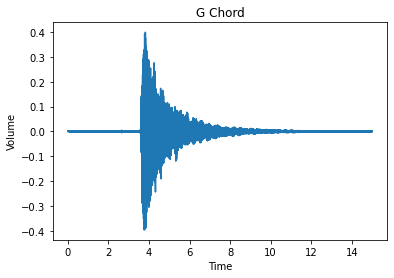

In [30]:
# Plot the G chord with g_time along the x-axis and g_chord along the y-axis.
plt.plot(g_time, g_chord)
plt.title("G Chord")
plt.xlabel("Time")
plt.ylabel("Volume")

plt.show()

<b> You can use the IPython.display.Audio() function imported from IPython to play the audio in Jupiter Notebook. Play the audio below and compare what you hear with the graph of the G chord.</b>

In [31]:
# Run this cell and play by pressing the play button
IPython.display.Audio(g_chord, rate=sampling_rate)

## Exercise 3: Fourier Transform
Find the Fourier transform of the G chord and the corresponding sample frequencies.

In [32]:
# Find the Fourier transform of the G chord
F_g = fft.rfft(g_chord)

# Find the correspoiding sample frequencies
g_freq_sample = fft.rfftfreq(g_chord.shape[0], 1/sampling_rate)

## Exercise 4: Plot the Frequencies
Plot both the imaginary and real part of the frequencies. If needed, use slicing to get a better look at the interesting parts.

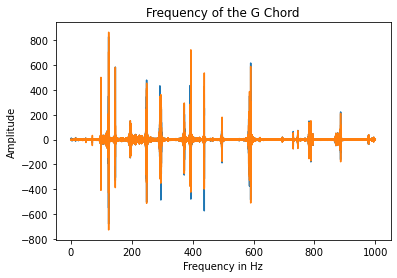

In [33]:
# Plot the frequencies
plt.plot(g_freq_sample[:15000], F_g.real[:15000])
plt.plot(g_freq_sample[:15000], F_g.imag[:15000])

plt.title("Frequency of the G Chord")
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude")
plt.show()

## Exercise 5: Smoothing the Signal


### Exercise 5a:
Smooth the signal by cutting of frequencies over 950Hz.Thereafter, use the inverse Fourier transform.

In [34]:
# Cut of the frequencies over 950Hz.
F_g[g_freq_sample > 950] = 0

In [35]:
# Finding the inverse Fourier transform of the new function.
smooth_g = fft.irfft(F_g)

### Exercise 5b:
Plot the smoothed audio signal in a similar way to Exercise 2. Try also to play the new audio signal. How does it compare to the original G chord audio?

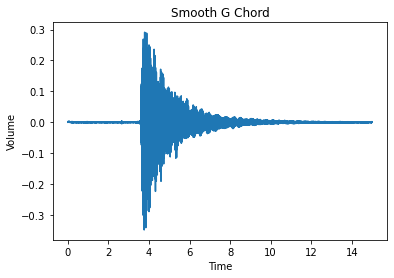

In [36]:
# New smoothed audio
plt.plot(g_time, smooth_g)
plt.title("Smooth G Chord")
plt.xlabel("Time")
plt.ylabel("Volume")

plt.show()

In [37]:
# For playable audio file
IPython.display.Audio(smooth_g, rate=sampling_rate)

<i>Conclusion:</i> The new audio sounds darker and less interesting. This is due to us removing the higher frequencies from the signal.

## Exercise 6: E Tone

Plot the E tone in a similar way as we did for the G chord. Play the E tone.

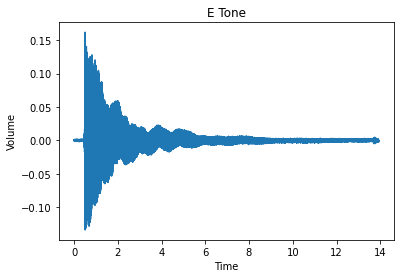

In [38]:
# Plot the E tone
plt.plot(e_time, e_tone)
plt.title("E Tone")
plt.xlabel("Time")
plt.ylabel("Volume")

plt.show()

In [39]:
# E tone audio
IPython.display.Audio(e_tone, rate=sampling_rate)

## Exercise 7: Compressing the Sound

### Exercise 7a:
Take the Fourier transform of the E tone and find the sample frequencies. Plot the real and imaginary part of the Fourier transforms. If needed, use slicing to get a better look at the interesting parts of the signal.

In [40]:
# The Fourier transform of the E tone, with its sample frequencies
F_e = fft.rfft(e_tone)
e_freq_samples = fft.rfftfreq(e_tone.shape[0], 1/sampling_rate)

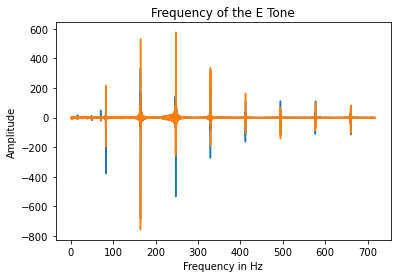

In [41]:
# Plot the frequencies of the E tone
plt.plot(e_freq_samples[:10000], F_e.real[:10000])
plt.plot(e_freq_samples[:10000], F_e.imag[:10000])

plt.title("Frequency of the E Tone")
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude")
plt.show()

<i>Comment:</i> Note that it looks like the frequencies are appearing with equal distance between them. This is because it only contains E's.

### Exercise 7b:
Compress the signal by removing all frequencies with a lower amplitude than $10$ in absolute value. Compare the number of nonzero elements before and after. Plot the result.

In [42]:
# Count the number of nonzero entries before compressing
nonzero_before = np.count_nonzero(F_e)

In [43]:
# Remove all values wiht low amplitude.
F_e[np.abs(F_e) < 10] = 0

In [44]:
# Count the number of nonzero entries after compressing
nonzero_after = np.count_nonzero(F_e)
print(f"There are only {(100 * nonzero_after/nonzero_before):.2f}% of nonzero terms left.")

There are only 1.00% of nonzero terms left.


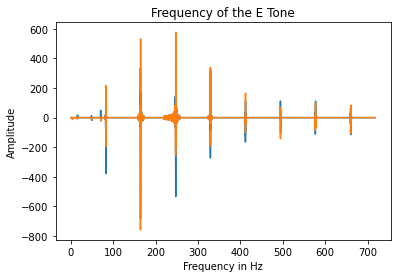

In [45]:
# Plot after compressing
plt.plot(e_freq_samples[:10000], F_e.real[:10000])
plt.plot(e_freq_samples[:10000], F_e.imag[:10000])

plt.title("Frequency of the E Tone")
plt.xlabel("Frequency in Hz")
plt.ylabel("Amplitude")
plt.show()

### Exercise 7c:
Go back with the inverse Fourier transform and plot the resulting sound. Listen to the sound. Can you hear a difference?

In [46]:
# Finding the inverse Fourier transform of the compressed audio
compressed = fft.irfft(F_e)

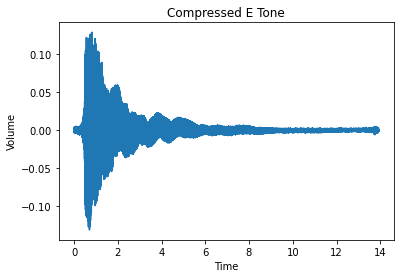

In [47]:
# Plotting the compressed E tone
plt.plot(e_time, compressed)
plt.title("Compressed E Tone")
plt.xlabel("Time")
plt.ylabel("Volume")

plt.show()

In [48]:
# Compressed E tone audio
IPython.display.Audio(compressed, rate=sampling_rate)

## Moral of the Story

We have seen that NumPy's fft module gives a convenient way to take Fourier transforms. This have allowed us to compress and smooth out audio signals in this exercise set. However, you should be aware that the crude methods we have shown are somewhat simplistic. In real audio manipulation, one usually applies what is called <b>filters</b> instead of cutting off the values at a certain threshold. Nevertheless, what we have learned gives us valuable insight into how to process audio with Python. 